# Laporan Analisis Bab

**Judul Buku:** Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow
**Penulis:** Aurélien Géron
**Edisi:** Kedua, Diperbarui untuk TensorFlow 2

---

## Bab 14: Deep Computer Vision Using Convolutional Neural Networks

**I. Pendahuluan**
Bab 14 dari buku "Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow" mengupas tuntas tentang Convolutional Neural Networks (CNNs) dan aplikasinya dalam visi komputer mendalam. Penulis memulai dengan menjelaskan mengapa tugas-tugas visual yang bagi manusia terasa sepele (seperti mendeteksi anak anjing dalam gambar) sebenarnya sangat kompleks bagi komputer, dan bagaimana persepsi visual sebagian besar terjadi di luar kesadaran kita, melibatkan modul sensorik khusus di otak. CNNs, yang terinspirasi dari studi korteks visual otak, telah digunakan dalam pengenalan gambar sejak tahun 1980-an dan kini telah mencapai kinerja *superhuman* pada tugas-tugas visual yang kompleks. Bab ini bertujuan untuk menjelaskan asal-usul CNN, blok pembangunnya, implementasinya menggunakan TensorFlow dan Keras, serta arsitektur CNN terbaik dan tugas-tugas visual lainnya seperti deteksi objek dan segmentasi semantik.

**II. Arsitektur Korteks Visual dan Inspirasi CNN**
Penulis merujuk pada eksperimen David H. Hubel dan Torsten Wiesel pada kucing (1958-1959) yang memberikan wawasan krusial tentang struktur korteks visual. Temuan utama meliputi:
* **Bidang Reseptif Lokal:** Banyak neuron di korteks visual memiliki bidang reseptif lokal yang kecil, artinya mereka hanya bereaksi terhadap stimulus visual di wilayah terbatas dari bidang pandang.
* **Respons Pola Spesifik:** Beberapa neuron hanya bereaksi terhadap garis horizontal, sementara yang lain bereaksi terhadap garis dengan orientasi berbeda.
* **Kombinasi Pola Tingkat Rendah:** Neuron tingkat yang lebih tinggi bereaksi terhadap pola yang lebih kompleks yang merupakan kombinasi dari pola tingkat rendah.

Pengamatan ini mengarah pada gagasan bahwa neuron tingkat tinggi dibangun di atas output neuron tingkat rendah yang berdekatan. Studi ini menginspirasi *neocognitron* (1980) yang kemudian berkembang menjadi CNN. LeNet-5 (1998) oleh Yann LeCun et al. merupakan tonggak penting yang memperkenalkan lapisan konvolusional dan lapisan *pooling*. CNN mengatasi masalah jumlah parameter yang besar pada *deep neural network* yang sepenuhnya terhubung untuk gambar besar melalui lapisan yang terhubung sebagian dan *weight sharing*.

**III. Lapisan Konvolusional (Convolutional Layers)**
Lapisan konvolusional adalah blok pembangun terpenting dari CNN. Neuron pada lapisan konvolusional pertama hanya terhubung ke piksel dalam bidang reseptifnya. Arsitektur ini memungkinkan jaringan untuk fokus pada fitur tingkat rendah yang kecil pada lapisan tersembunyi pertama, kemudian merakitnya menjadi fitur tingkat tinggi yang lebih besar pada lapisan tersembunyi berikutnya, dan seterusnya.

**Konsep-konsep Penting:**
* **Zero Padding:** Penambahan nol di sekitar input untuk menjaga tinggi dan lebar lapisan tetap sama dengan lapisan sebelumnya.
* **Stride:** Pergeseran dari satu bidang reseptif ke bidang reseptif berikutnya. Ini dapat mengurangi kompleksitas komputasi model secara dramatis.
* **Filter (Convolution Kernels):** Bobot neuron dapat direpresentasikan sebagai gambar kecil seukuran bidang reseptif. Sebuah lapisan dengan neuron yang menggunakan filter yang sama akan menghasilkan *feature map* yang menyoroti area dalam gambar yang paling mengaktifkan filter tersebut. Lapisan konvolusional akan belajar secara otomatis filter yang paling berguna selama pelatihan.
* **Penumpukan Multiple Feature Maps:** Lapisan konvolusional memiliki banyak filter dan menghasilkan satu *feature map* per filter, sehingga lebih akurat direpresentasikan dalam 3D. Semua neuron dalam *feature map* tertentu berbagi parameter yang sama (*weight* dan *bias term*), secara drastis mengurangi jumlah parameter model.

**Implementasi TensorFlow:**
* Gambar input direpresentasikan sebagai tensor 3D `[height, width, channels]`.
* *Mini-batch* direpresentasikan sebagai tensor 4D `[mini-batch size, height, width, channels]`.
* Bobot lapisan konvolusional direpresentasikan sebagai tensor 4D `[fh, fw, fn', fn]`.
* `tf.nn.conv2d()` digunakan untuk menerapkan filter.
* Parameter `strides` dapat berupa 1D array dengan empat elemen, di mana dua elemen sentral adalah *vertical* dan *horizontal strides*.
* Parameter `padding` harus berupa `"SAME"` atau `"VALID"`.
* `keras.layers.Conv2D` adalah lapisan Keras yang lebih tinggi untuk konvolusi.

**Persyaratan Memori:**
* Lapisan konvolusional membutuhkan RAM yang besar, terutama selama pelatihan karena *reverse pass* dari *backpropagation* membutuhkan semua nilai perantara yang dihitung selama *forward pass*.
* Selama inferensi, RAM yang ditempati satu lapisan dapat dilepaskan segera setelah lapisan berikutnya dihitung.
* Solusi untuk masalah *out-of-memory* meliputi pengurangan ukuran *mini-batch*, pengurangan dimensi dengan *stride*, penghapusan lapisan, penggunaan *float* 16-bit, atau distribusi CNN ke beberapa perangkat.

**IV. Lapisan Pooling (Pooling Layers)**
Lapisan *pooling* bertujuan untuk mensub-sampel (mengecilkan) gambar input untuk mengurangi beban komputasi, penggunaan memori, dan jumlah parameter (membatasi risiko *overfitting*).

**Konsep-konsep Penting:**
* Setiap neuron pada lapisan *pooling* terhubung ke output sejumlah neuron terbatas di lapisan sebelumnya dalam bidang reseptif persegi panjang kecil.
* Tidak ada bobot pada neuron *pooling*; mereka hanya mengumpulkan input menggunakan fungsi agregasi seperti `max` atau `mean`.
* **Max Pooling Layer:** Jenis *pooling* yang paling umum. Hanya nilai input maksimum dalam setiap bidang reseptif yang diteruskan ke lapisan berikutnya.
* **Translation Invariance:** Lapisan *max pooling* memperkenalkan tingkat invariansi terhadap translasi kecil, yang berarti prediksi tidak terlalu bergantung pada pergeseran objek.
* **Kekurangan Max Pooling:** Sangat destruktif (menghilangkan banyak informasi) dan invariansi mungkin tidak selalu diinginkan (misalnya, dalam segmentasi semantik dibutuhkan *equivariance*).

**Implementasi TensorFlow:**
* `keras.layers.MaxPool2D` untuk *max pooling*.
* `keras.layers.AvgPool2D` untuk *average pooling*.
* `tf.nn.max_pool()` untuk *depthwise max pooling* (lapisan Keras tidak memiliki ini secara langsung).
* `keras.layers.GlobalAvgPool2D` untuk lapisan *global average pooling* (menghitung rata-rata seluruh *feature map*).

**V. Arsitektur CNN**
Arsitektur CNN yang khas menumpuk beberapa lapisan konvolusional (biasanya diikuti oleh lapisan ReLU), kemudian lapisan *pooling*, diikuti oleh beberapa lapisan konvolusional lainnya (+ReLU), dan seterusnya. Gambar semakin kecil saat melewati jaringan, tetapi juga semakin dalam (dengan lebih banyak *feature map*). Pada bagian atas tumpukan, ditambahkan jaringan saraf *feedforward* biasa yang terdiri dari beberapa lapisan yang terhubung sepenuhnya (+ReLUs), dan lapisan terakhir menghasilkan prediksi.

**Kesalahan Umum:** Menggunakan kernel konvolusional yang terlalu besar. Lebih baik menumpuk dua lapisan dengan kernel 3x3 daripada satu lapisan 5x5 karena akan menggunakan lebih sedikit parameter, membutuhkan lebih sedikit komputasi, dan umumnya berkinerja lebih baik.

**Arsitektur Populer:**
* **LeNet-5 (1998):** Arsitektur CNN yang paling dikenal, digunakan untuk pengenalan digit tulisan tangan (MNIST). Terdiri dari lapisan konvolusional, *average pooling*, dan lapisan yang terhubung sepenuhnya. Output lapisan terakhir menggunakan jarak Euclidean.
* **AlexNet (2012):** Memenangkan tantangan ImageNet ILSVRC 2012 dengan margin besar. Mirip dengan LeNet-5, tetapi jauh lebih besar dan lebih dalam, serta yang pertama menumpuk lapisan konvolusional secara langsung. Menggunakan *dropout* dan *data augmentation* untuk mengurangi *overfitting*, serta *local response normalization* (LRN) untuk mendorong *feature map* yang berbeda untuk berspesialisasi.
    * **Data Augmentation:** Secara artifisial meningkatkan ukuran *training set* dengan menghasilkan banyak varian realistis dari setiap *training instance*, mengurangi *overfitting*.
* **GoogLeNet (2014):** Memenangkan tantangan ILSVRC 2014, mendorong *top-five error rate* di bawah 7%. Kinerja ini sebagian besar berasal dari penggunaan *inception modules* yang memungkinkan GoogLeNet menggunakan parameter jauh lebih efisien daripada arsitektur sebelumnya (sekitar 10 kali lebih sedikit parameter daripada AlexNet). *Inception module* memiliki lapisan konvolusional 1x1, 3x3, dan 5x5, serta *max pooling*, yang outputnya digabungkan. Lapisan 1x1 bertindak sebagai lapisan *bottleneck* untuk mengurangi dimensi dan biaya komputasi.
* **ResNet (Residual Network) (2015):** Memenangkan tantangan ILSVRC 2015, menghasilkan *top-five error rate* di bawah 3.6%. Varian pemenang menggunakan CNN yang sangat dalam yang terdiri dari 152 lapisan. Kunci untuk melatih jaringan sedalam itu adalah penggunaan *skip connections* (juga disebut *shortcut connections*), di mana sinyal yang masuk ke suatu lapisan juga ditambahkan ke output lapisan yang terletak sedikit lebih tinggi dalam tumpukan. Ini disebut *residual learning*.
* **Xception (Extreme Inception) (2016):** Diusulkan oleh François Chollet. Menggantikan *inception modules* dengan jenis lapisan khusus yang disebut *depthwise separable convolution layer*. Lapisan ini menggunakan lebih sedikit parameter, memori, dan komputasi daripada lapisan konvolusional biasa, dan umumnya berkinerja lebih baik.
* **SENet (Squeeze-and-Excitation Network) (2017):** Arsitektur pemenang tantangan ILSVRC 2017. Arsitektur ini memperluas arsitektur yang sudah ada seperti jaringan *inception* dan ResNet, serta meningkatkan kinerjanya. Ini dilakukan dengan menambahkan blok SE kecil ke setiap unit dalam arsitektur asli (yaitu, setiap *inception module* atau setiap unit residual). Blok SE menganalisis output unit yang terpasang, fokus secara eksklusif pada dimensi kedalaman, dan belajar fitur mana yang biasanya paling aktif bersamaan, kemudian mengkalibrasi ulang *feature map*.

**Implementasi ResNet-34 dengan Keras:**
Penulis memberikan contoh implementasi ResNet-34 dari awal menggunakan Keras, menunjukkan fleksibilitas Keras API.

**Menggunakan Model Pretrained dari Keras:**
Keras menyediakan banyak arsitektur standar yang sudah dibangun dalam paket `keras.applications`, seperti ResNet-50, Inception-v3, Xception, VGGNet, dan MobileNet. Model-model ini dapat dimuat dengan bobot yang sudah dilatih di ImageNet. Dibutuhkan *preprocessing* gambar agar sesuai dengan ukuran dan format yang diharapkan model pretrained.

**VI. Klasifikasi dan Lokalisasi**
Melokalisasi objek dalam gambar dapat diekspresikan sebagai tugas regresi, dengan memprediksi *bounding box* di sekitar objek (koordinat pusat, tinggi, dan lebar). Ini melibatkan penambahan lapisan output *dense* kedua dengan empat unit. Tantangan utamanya adalah mendapatkan label *bounding box*, yang seringkali membutuhkan anotasi manual atau *crowdsourcing*. Metrik umum untuk mengevaluasi ini adalah *Intersection over Union* (IoU).

**VII. Deteksi Objek (Object Detection)**
Tugas klasifikasi dan lokalisasi banyak objek dalam gambar.
* **Pendekatan Tradisional (Sliding Window):** CNN digeser melintasi gambar, memprediksi objek di setiap wilayah. Membutuhkan *non-max suppression* untuk menghilangkan *bounding box* yang redundan.
* **Jaringan Konvolusional Penuh (Fully Convolutional Networks - FCNs):** Ide FCN pertama kali diperkenalkan pada tahun 2015 oleh Jonathan Long et al. untuk segmentasi semantik. Konsepnya adalah mengganti lapisan *dense* di bagian atas CNN dengan lapisan konvolusional. FCN dapat memproses gambar dengan ukuran berapapun dan jauh lebih efisien karena hanya melihat gambar sekali.
* **You Only Look Once (YOLO):** Arsitektur deteksi objek yang sangat cepat dan akurat. Mengeluarkan lima *bounding box* untuk setiap sel *grid* beserta *objectness score* dan probabilitas kelas. Memprediksi *offset* relatif terhadap koordinat sel *grid*. Menggunakan *anchor boxes* (dimensi *bounding box* representatif) dan dilatih dengan gambar dari skala yang berbeda.
    * **Mean Average Precision (mAP):** Metrik umum dalam deteksi objek. Menghitung rata-rata *Average Precision* (AP) untuk setiap kelas.

**VIII. Segmentasi Semantik (Semantic Segmentation)**
Dalam segmentasi semantik, setiap piksel diklasifikasikan berdasarkan kelas objek tempat piksel itu berada (misalnya, jalan, mobil, pejalan kaki). Kesulitan utama adalah hilangnya resolusi spasial di CNN karena lapisan dengan *stride* > 1. Solusi umum melibatkan FCN dengan lapisan *upsampling* (*transposed convolutional layer*) dan *skip connections* dari lapisan yang lebih rendah untuk memulihkan informasi spasial.

**IX. Kesimpulan**
Bab 14 secara komprehensif menjelaskan dasar-dasar CNN, blok pembangunnya, dan arsitektur penting yang telah membentuk bidang visi komputer mendalam. Implementasi dengan Keras disajikan secara praktis, menunjukkan kemudahan penggunaan API. Selain itu, bab ini juga membahas tugas-tugas lanjutan seperti deteksi objek dan segmentasi semantik, menyoroti kompleksitas dan inovasi di dalamnya. Bidang ini terus berkembang pesat, dengan munculnya arsitektur baru setiap tahunnya.

# REPRODUCE CODE

## TensorFlow Implementation

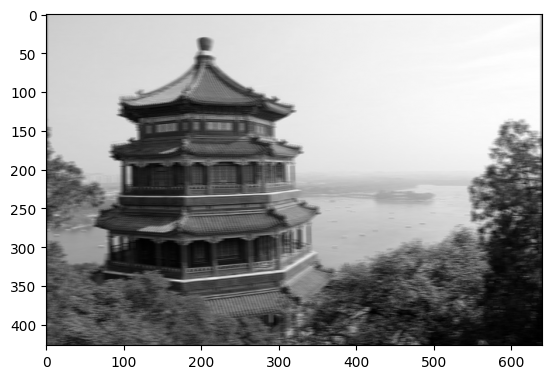

In [1]:
from sklearn.datasets import load_sample_image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

In [2]:
import keras
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
padding="same", activation="relu")

## TensorFlow Implementation (Pooling Layers)

In [3]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

In [5]:
# output = tf.nn.max_pool(images,
#                         ksize=(1, 1, 1, 3), # Original problematic ksize
#                         strides=(1, 1, 1, 3), # Original problematic strides
#                         padding="VALID")

# Changed ksize and strides for spatial pooling (e.g., 2x2 pool with stride 2)
output = tf.nn.max_pool(images,
                        ksize=(1, 2, 2, 1),
                        strides=(1, 2, 2, 1),
                        padding="VALID")

In [6]:
depth_pool = keras.layers.Lambda(
lambda X: tf.nn.max_pool(X, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3),
padding="valid"))

In [7]:
global_avg_pool = keras.layers.GlobalAvgPool2D()

In [8]:
global_avg_pool = keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1, 2]))

## CNN Architectures

In [9]:
model = keras.models.Sequential([
keras.layers.Conv2D(64, 7, activation="relu", padding="same",
input_shape=[28, 28, 1]),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Flatten(),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dropout(0.5),
keras.layers.Dense(64, activation="relu"),
keras.layers.Dropout(0.5),
keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Implementing a ResNet-34 CNN Using Keras

In [10]:
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            keras.layers.Conv2D(filters, 3, strides=strides,
                                padding="same", use_bias=False),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters, 3, strides=1,
                                padding="same", use_bias=False),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                keras.layers.Conv2D(filters, 1, strides=strides,
                                    padding="same", use_bias=False),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[224, 224, 3],
padding="same", use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

## Using Pretrained Models from Keras

In [12]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [13]:
images_resized = tf.image.resize(images, [224, 224])

In [14]:
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)

In [15]:
Y_proba = model.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [16]:
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print(" {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
Image #0
 n02825657 - bell_cote    82.35%
 n03877845 - palace       6.75%
 n03781244 - monastery    4.19%

Image #1
 n03530642 - honeycomb    49.81%
 n13040303 - stinkhorn    33.96%
 n02206856 - bee          4.35%



## Pretrained Models for Transfer Learning

In [17]:
import tensorflow_datasets as tfds
dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size = info.splits["train"].num_examples # 3670
class_names = info.features["label"].names # ["dandelion", "daisy", ...]
n_classes = info.features["label"].num_classes # 5

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.YO6M26_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [18]:
test_set = tfds.load("tf_flowers", split='train[:10%]', as_supervised=True)
valid_set = tfds.load("tf_flowers", split='train[10%:25%]', as_supervised=True)
train_set = tfds.load("tf_flowers", split='train[25%:]', as_supervised=True)

In [19]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

In [20]:
batch_size = 32
train_set = train_set.shuffle(1000)
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set.map(preprocess).batch(batch_size).prefetch(1)

In [21]:
base_model = keras.applications.xception.Xception(weights="imagenet",
include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [22]:
for layer in base_model.layers:
    layer.trainable = False

In [23]:
optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
metrics=["accuracy"])
history = model.fit(train_set, epochs=5, validation_data=valid_set)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 223ms/step - accuracy: 0.6872 - loss: 2.1427 - val_accuracy: 0.8475 - val_loss: 1.6936
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 161ms/step - accuracy: 0.8666 - loss: 1.1772 - val_accuracy: 0.8022 - val_loss: 1.8836
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - accuracy: 0.8824 - loss: 0.9612 - val_accuracy: 0.8603 - val_loss: 1.2584
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.9381 - loss: 0.4044 - val_accuracy: 0.8457 - val_loss: 1.3615
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 166ms/step - accuracy: 0.9577 - loss: 0.2514 - val_accuracy: 0.8675 - val_loss: 1.2377


In [25]:
for layer in base_model.layers:
    layer.trainable = True

# Use 'learning_rate' instead of 'lr'
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=0.001)

# Complete the compile and fit calls
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set, epochs=5, validation_data=valid_set) # Example: continuing training for 5 more epochs

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


86/86 ━━━━━━━━━━━━━━━━━━━━ 87s 589ms/step - accuracy: 0.7651 - loss: 0.8151 - val_accuracy: 0.8439 - val_loss: 0.6071
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 60s 563ms/step - accuracy: 0.9576 - loss: 0.1307 - val_accuracy: 0.8929 - val_loss: 0.3535
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 78s 517ms/step - accuracy: 0.9836 - loss: 0.0467 - val_accuracy: 0.8857 - val_loss: 0.4658
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 87s 576ms/step - accuracy: 0.9878 - loss: 0.0455 - val_accuracy: 0.9201 - val_loss: 0.3255
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 80s 559ms/step - accuracy: 0.9955 - loss: 0.0149 - val_accuracy: 0.9038 - val_loss: 0.4205


## Classification and Localization

In [26]:
base_model = keras.applications.xception.Xception(weights="imagenet",
include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
class_output = keras.layers.Dense(n_classes, activation="softmax")(avg)
loc_output = keras.layers.Dense(4)(avg)
model = keras.Model(inputs=base_model.input,
outputs=[class_output, loc_output])
model.compile(loss=["sparse_categorical_crossentropy", "mse"],
loss_weights=[0.8, 0.2], # depends on what you care most about
optimizer=optimizer, metrics=["accuracy"])